In [5]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [15]:
# read fileusing pandas
data=pd.read_csv(r'D:\\AI_ML_DL\Data&Python_code\DATA\CSV_file\Test_Data.csv')
data.head(4)

,Unnamed: 0,A,B,C,D,E,F,G,H,I,...,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,...,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,A
1,1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,...,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,A
2,2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,...,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,A
3,3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,...,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,A


In [7]:
#using origianl dataset
t1=np.genfromtxt(r'D:\\AI_ML_DL\Data&Python_code\DATA\CSV_file\Test_Data.csv', delimiter=",")
t2=t1[1:,1:42]
np.shape(t1)


(5840, 42)

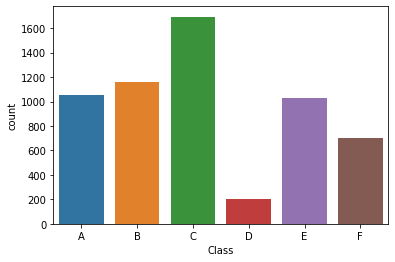

In [28]:
import seaborn as sns
y=pd.read_csv(r'D:\\AI_ML_DL\Data&Python_code\DATA\CSV_file\Test_Data.csv')
sns.countplot(x='Class', data=y)

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
y=pd.read_csv(r'D:\\AI_ML_DL\Data&Python_code\DATA\CSV_file\Test_Data.csv')

In [3]:
train_outcome = pd.crosstab(index=y["Class"],columns="count")
print(train_outcome)

col_0  count
Class       
A       1052
B       1163
C       1694
D        202
E       1029
F        699


In [4]:
p=y.drop('Class',axis=1)
y1=y['Class']
print(p.shape)
print(y1.shape)

X_train, X_test, y_train, y_test = train_test_split(p, y1, test_size = 0.20)

(5839, 41)
(5839,)


In [8]:
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")
print("Dimension of Test set",y_test.shape,"\n")
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

Dimension of Train set (4671, 41)
Dimension of Test set (1168, 41) 

Dimension of Test set (1168,) 

Number of numeric features: 41


In [25]:

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test,copy=None)

In [10]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [11]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))



Best score for training data: 0.5457075572682509 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [29]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[ 81  52  38   0   6  14]
 [ 49 100  63   1   8   5]
 [ 15  33 269   0  15   2]
 [  1   7  16  14  11   3]
 [ 17  22  35   7 139  12]
 [ 20   7  40   6   6  54]]


              precision    recall  f1-score   support

           0       0.44      0.42      0.43       191
           1       0.45      0.44      0.45       226
           2       0.58      0.81      0.68       334
           3       0.50      0.27      0.35        52
           4       0.75      0.60      0.67       232
           5       0.60      0.41      0.48       133

    accuracy                           0.56      1168
   macro avg       0.55      0.49      0.51      1168
weighted avg       0.57      0.56      0.55      1168

Training set score for SVM: 0.633055
Testing  set score for SVM: 0.562500
